In [1]:
import os
import sys
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

from scipy.stats import betabinom
from scipy.optimize import minimize

script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions4 import *
from misc import *
from sinkhorn import * 

datadir = "../../../gdrive/github_data/pyJSMF-RAW-data"

## A vert

0.0019352874999999927


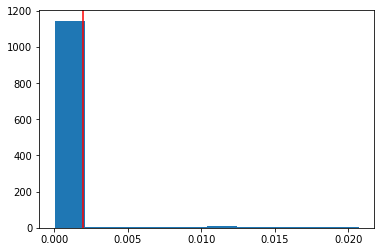

In [2]:
file = open(f'{datadir}/improve_C.pkl', 'rb')
out = pickle.load(file)
file.close()


X = out["X"]
Ftrue = out["Ftrue"]
Ltrue = out["Ltrue"]
Pi_true = out["Pi_true"]
Pi_eb = out["Pi"]
AB = out["AB"]
k = 3 ## forgot to store
n, p = X.shape

## truth
Ctrue = Pi_true.T @ Pi_true / n
Cbar0 = Ctrue / Ctrue.sum(axis = 1)[:, None]

Pi = X / X.sum(axis = 1)[:, None]
C = Pi.T @ Pi / n

## naive Cbar
Cbar1 = C / C.sum(axis = 1)[:, None] 

## apply EB shrinkage to estimate Pi, then construct CBar
Cbar2 = Pi_eb.T @ Pi_eb / n
Cbar2 /= Cbar2.sum(axis = 1)[:, None]

## Cbar without scaling C
Cbar3 = C / C.sum(axis = 1).max()

## C scaled with a cutoff
d = C.sum(axis = 1)
cutoff = np.quantile(d, [0.953])[0] ## need a more principled way to do this!!
d[d < cutoff] = cutoff
Cbar4 = C / d[:, None]

print(cutoff)
plt.hist(C.sum(axis = 1))
plt.axvline(x=cutoff, color = "red")
plt.show()

In [3]:
%%capture

S0, _, _ = findS(Cbar0, k)
S1, _, _ = findS(Cbar1, k)
S2, _, _ = findS(Cbar2, k)
S3, _, _ = findS(Cbar3, k)
S4, _, _ = findS(Cbar4, k)

Cbar0_pj = pca_proj(Cbar0)
Cbar1_pj = pca_proj(Cbar1)
Cbar2_pj = pca_proj(Cbar2)
Cbar3_pj = pca_proj(Cbar3)
Cbar4_pj = pca_proj(Cbar4)

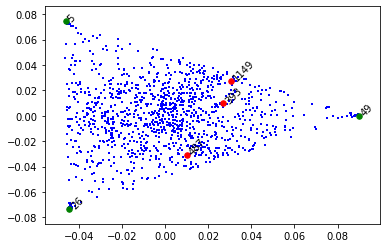

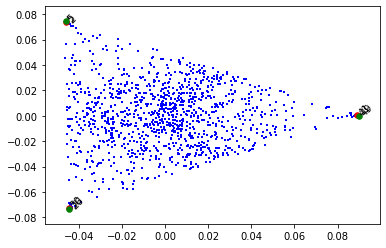

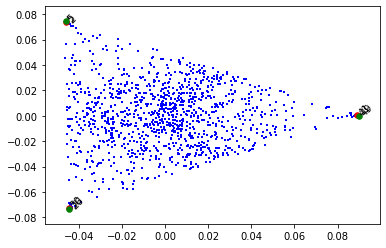

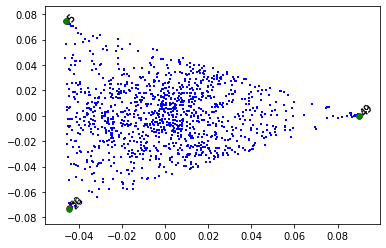

In [4]:
which_dim = [0, 1]
vis_extremal2(Cbar0_pj, S0, S1, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar0_pj, S0, S2, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar0_pj, S0, S3, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar0_pj, S0, S4, which_dim = which_dim, annotate=True,fontsize=10)

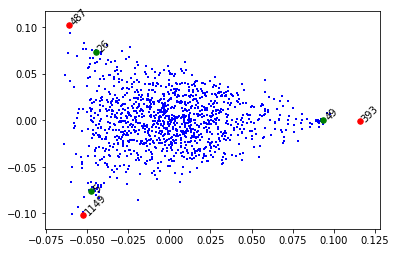

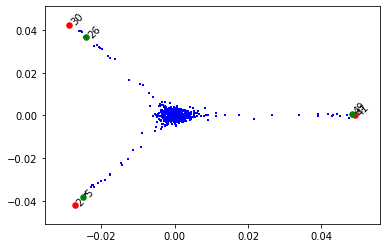

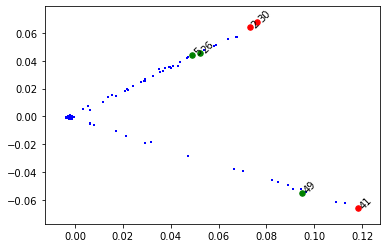

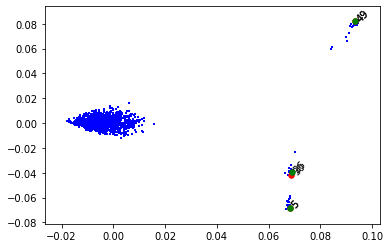

In [5]:
which_dim = [0, 1]
vis_extremal2(Cbar1_pj, S0, S1, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar2_pj, S0, S2, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar3_pj, S0, S3, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar4_pj, S0, S4, which_dim = which_dim, annotate=True,fontsize=10)

## More realistic example

In [6]:
## load data
dataname = "sla"
k = 6
rate=3

datafile=f"{datadir}/fit_sim_{dataname}_fastTopics_k{k}_rate{rate}.pkl"
with open(datafile, "rb") as f:
    fitted = pickle.load(f)
    
file = open(f'{datadir}/improve_C2.pkl', 'rb')
out = pickle.load(file)
file.close()

X = fitted['X'].toarray()
Ltrue = fitted['Ltrue']
Ftrue = fitted['Ftrue']


Pi_true = Ltrue @ Ftrue.T
Pi_eb = out["Pi"]
AB = out["AB"]
n, p = X.shape




In [7]:
# ## C scaled with a cutoff
# d = C.sum(axis = 1)
# cutoff = np.quantile(d, [0.953])[0] ## need a more principled way to do this!!
# d[d < cutoff] = cutoff
# Cbar4 = C / d[:, None]

0.00047829802343971316


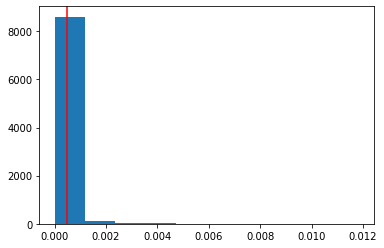

In [8]:
## truth
Ctrue = Pi_true.T @ Pi_true / n
Cbar0 = Ctrue / Ctrue.sum(axis = 1)[:, None]



## naive Cbar
Pi = X / X.sum(axis = 1)[:, None]
C = Pi.T @ Pi / n
Cbar1 = C / C.sum(axis = 1)[:, None] 

## apply EB shrinkage to estimate Pi, then construct CBar
Cbar2 = Pi_eb.T @ Pi_eb / n
Cbar2 /= Cbar2.sum(axis = 1)[:, None]

## Cbar without scaling C
d = C.sum(axis = 1)
Cbar3 = C / d.max()

## C scaled with a cutoff
cutoff = np.quantile(d, [0.98])[0] ## need a more principled way to do this!!
d[d < cutoff] = cutoff
Cbar4 = C / d[:, None]

print(cutoff)
plt.hist(C.sum(axis = 1))
plt.axvline(x=cutoff, color = "red")
plt.show()

In [11]:
%%capture

S0, _, _ = findS(Cbar0, k)
S1, _, _ = findS(Cbar1, k)
S2, _, _ = findS(Cbar2, k)
S3, _, _ = findS(Cbar3, k)
S4, _, _ = findS(Cbar4, k)

Cbar0_pj = pca_proj(Cbar0)
Cbar1_pj = pca_proj(Cbar1)
Cbar2_pj = pca_proj(Cbar2)
Cbar3_pj = pca_proj(Cbar3)
Cbar4_pj = pca_proj(Cbar4)

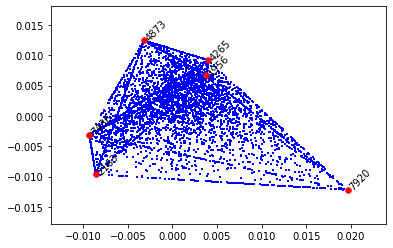

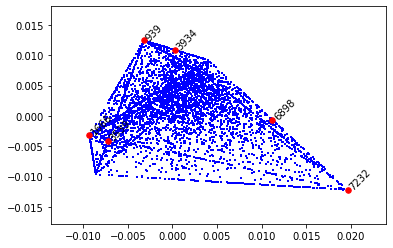

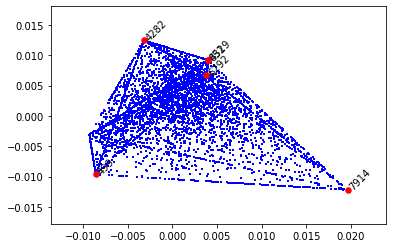

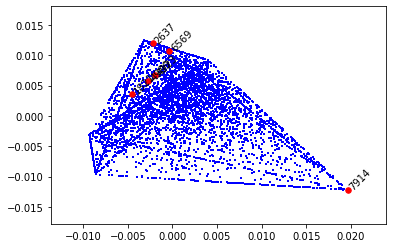

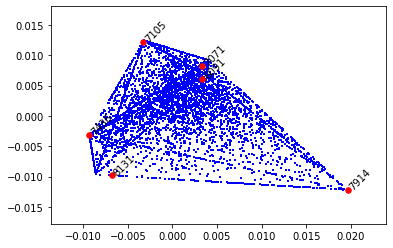

In [15]:
which_dim = [0, 1]
vis_extremal_pca(Cbar0_pj, S0, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal_pca(Cbar0_pj, S1, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal_pca(Cbar0_pj, S2, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal_pca(Cbar0_pj, S3, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal_pca(Cbar0_pj, S4, which_dim = which_dim, annotate=True,fontsize=10)


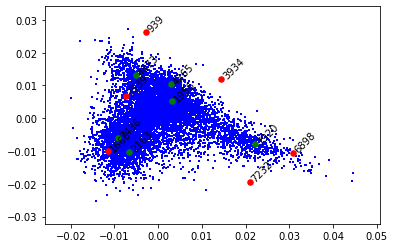

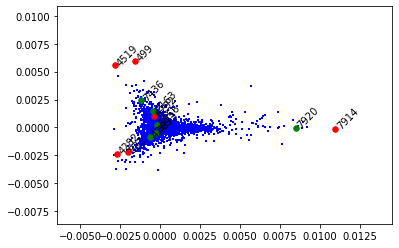

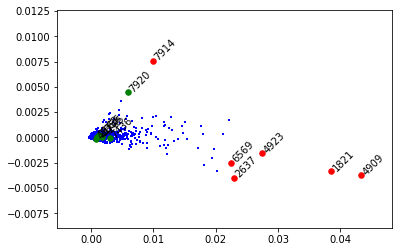

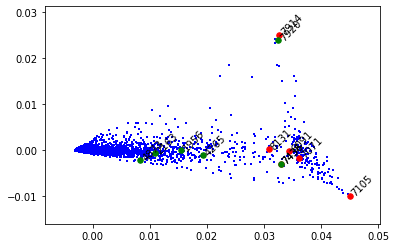

In [13]:
which_dim = [0, 1]
vis_extremal2(Cbar1_pj, S0, S1, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar2_pj, S0, S2, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar3_pj, S0, S3, which_dim = which_dim, annotate=True,fontsize=10)
vis_extremal2(Cbar4_pj, S0, S4, which_dim = which_dim, annotate=True,fontsize=10)